<a href="https://colab.research.google.com/github/alibouch/TensorFlow_FSA_21-22/blob/main/Atelier_3_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier 3

In [1]:

import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Ragged tensors ((tenseurs irréguliers)
Un ragged tensor  est un tenseur de type particulier qui représente une liste de tableaux de tailles différentes.

In [2]:
r = tf.ragged.constant([[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]])

Affichez le deuxième élément du tenseur r :

In [3]:
print(r[1]) 

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


Affichez le deuxième et le troisième élément du tenseur r :

In [4]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [ ]:
r2 = tf.ragged.constant([[65, 66], [], [67]])

Concaténez le tenseur r au tenseur r2 le long de l’axe 0 :

In [5]:

print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [8]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])

Concaténez le tenseur r au tenseur r3 le long de l’axe 1 :

In [9]:
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [14]:
r4 = tf.ragged.constant([[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
[99, 97, 102, 102, 232], [21654, 21857]])

Convertissez le tenseur irrégulier r4 en tenseur normal en utilisant la méthode *to_tensor* :

In [15]:
r4.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse tensors (tenseurs creux)

Un sparse tensor est un tenseur contenant principalement des zéros.



Créez un sparse tensor de forme (3,4) et dont les valeurs des éléments d'indices (0,1), (1,0) et (2,3) sont respectivement 1, 2 et 3 :

In [16]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [17]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


Convertissez le sparse tensor s en tesor normal en utilisant la méthode *sparse.to_dense* :

In [ ]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

Peut-on multiplier un sparse tensor par une valeur scalaire? 

In [ ]:
s2 = s * 2.0

**Justifiez votre réponse :** 

Peut-on ajouter une valeur scalaire à un sparse tensor?

In [ ]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


**Justifiez votre réponse :** 

### Variables

In [ ]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

Multipliez le tensor v par 2 en utilisant la méthde assign() :

In [ ]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

Remplacez la valeur de l'élément d'indice (0,1) du tensor v par la valeur 42 :

In [ ]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

Remplacez la troisième colonne de v par le vecteur [0., 1.] :

In [ ]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

### Tensor Arrays (Tableaux de tenseurs)

In [ ]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [ ]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

Empilez tous les éléments de array dans un tenseur normal en invoquant la
méthode *stack()* :

In [ ]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

Calculez la moyenne et la variance de array le long de l'axe 0 (utilisez *tf.nn.moments*) :

In [ ]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [ ]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

## Fonction de perte personnalisée

Commençons par charger et préparer le dataset  California housing. Nous le chargeons d'abord, puis le divisons en un ensemble d'apprentissage, un ensemble de validation et un ensemble de test, et enfin nous le normalisons :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

Créez une fonction *my_mse()* avec deux arguments : les vraies labels `y_true` et les prédictions du modèle `y_pred`. Faites en sorte qu'il renvoie l'erreur quadratique moyenne à l'aide des opérations TensorFlow (Utlisez `tf.reduce_mean()` et `tf.square()`) :

In [ ]:
def my_mse(y_true, y_pred):

  

Créez une fonction *huber_fn()* avec deux arguments : les vraies labels `y_true` et les prédictions du modèle `y_pred`. Faites en sorte qu'il renvoie la perte de huber à l'aide des opérations TensorFlow  :
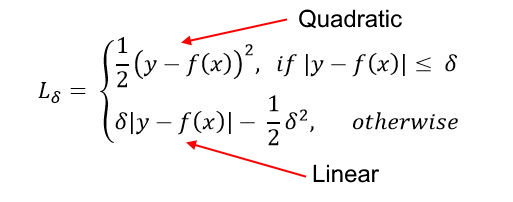

In [ ]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

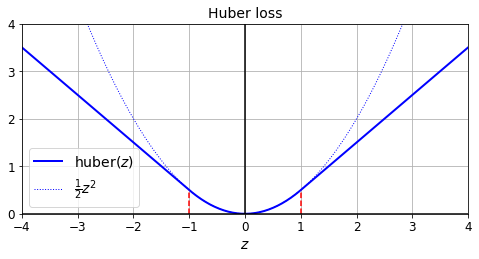

In [ ]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [ ]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

Compilez le modèle en utilisant la fonction de perte huber_fn, l'optimiseur nadam et la MAE comme metric :

In [ ]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.0443 - mae: 1.4660 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 0s 737us/step - loss: 0.2379 - mae: 0.5407 - val_loss: 0.2382 - val_mae: 0.5281


## Enregistrer et charger des modèles contenant des composants personnalisés

In [ ]:
model.save("my_model_with_a_custom_loss.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 970us/step - loss: 0.2054 - mae: 0.4982 - val_loss: 0.2209 - val_mae: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 769us/step - loss: 0.1999 - mae: 0.4900 - val_loss: 0.2127 - val_mae: 0.4986


Créez  une fonction `create_huber()` avec un seul argument seuil (threshold). cette fonction configure la fonction de perte `huber_fn()` :

In [ ]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2318 - mae: 0.4979 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 0s 749us/step - loss: 0.2309 - mae: 0.4960 - val_loss: 0.2372 - val_mae: 0.4879


In [ ]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2147 - mae: 0.4800 - val_loss: 0.2133 - val_mae: 0.4654
Epoch 2/2
363/363 [==============================] - 0s 763us/step - loss: 0.2119 - mae: 0.4762 - val_loss: 0.1992 - val_mae: 0.4643


Créez une sous-classe `Huberloss` de `keras.losses.Loss`, puis implémenter sa méthode get_config() :

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.3123 - mae: 1.3345 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 0s 760us/step - loss: 0.2659 - mae: 0.5270 - val_loss: 0.2660 - val_mae: 0.5089


In [ ]:
model.save("my_model_with_a_custom_loss_class.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 966us/step - loss: 0.2286 - mae: 0.4970 - val_loss: 0.2120 - val_mae: 0.4723
Epoch 2/2
363/363 [==============================] - 0s 757us/step - loss: 0.2216 - mae: 0.4904 - val_loss: 0.2045 - val_mae: 0.4725


In [ ]:
model.loss.threshold

2.0

## Couches personnalisées

Construisez une couche personnalisée avec en créant une sous-classe
de `keras.layers.Layer` :
Le constructeur prend tous les hyperparamètres en arguments (dans cet exemple `units` et `activation`) et il prend également un argument
`**kwargs`. Il invoque le constructeur parent, en lui passant les `kwargs` ; cela permet de prendre en charge les arguments standard, comme input_
shape, trainable et name. Il enregistre ensuite les hyperparamètres sous
forme d’attributs, en convertissant l’argument activation en une fonction
d’activation appropriée grâce à la fonction `keras.activations.get()`

La méthode `build()` a pour rôle de créer les variables de la couche en
invoquant la méthode `add_weight()` pour chaque poids. `build()` est
appelée lors de la première utilisation de la couche. À ce stade, Keras connaît la forme des entrées de la couche et la passera à la méthode `build()`. Elle est souvent indispensable à la création de certains poids. Par exemple, nous devons connaître le nombre de neurones de la couche précédente de façon à créer la matrice des poids des connexions (autrement dit, le "kernel") : il correspond à la taille de la dernière dimension des entrées. À la fin de la méthode `build()` (et uniquement à la fin), nous devons appeler la méthode `build()` du parent pour indiquer à Keras que la couche est construite.

• La méthode `call()` réalise les opérations souhaitées. Dans ce cas, nous
multiplions la matrice des entrées X et le noyau de la couche, nous ajoutons le vecteur de termes constants et nous appliquons la fonction d’activation au résultat. Nous obtenons alors la sortie de la couche.

• La méthode` compute_output_shape()` retourne simplement la forme
des sorties de cette couche. Dans cet exemple, elle est identique à la forme des entrées, excepté que la dernière dimension est remplacée par le nombre de neurones de la couche. Dans `tf.keras`, les formes sont des instances de la classe `tf.TensorShape`, que nous pouvons convertir en listes Python avec `as_list()`.

La méthode `get_config()` retourne un dictionnaire qui associe chaque
nom d’hyperparamètre à sa valeur. Elle commence par invoquer la méthode
`get_config()` de la classe parent, puis ajoute les nouveaux hyperparamètres à ce dictionnaire. Nous enregistrons l’intégralité de la configuration de la fonction d’activation en invoquant `keras.activations.serialize()`.

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [ ]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 898us/step - loss: 4.1268 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 419us/step - loss: 0.5474


0.5473727583885193

In [ ]:
model.save("my_model_with_a_custom_layer.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

## Modèles personnalisées :

In [ ]:
X_new_scaled = X_test_scaled

La sous-classe `ResidualBlock` de `keras.layers.Layer`, correspondant au bloc suivant :


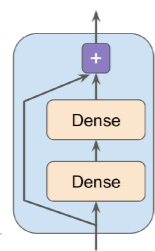

In [ ]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

Créez une sous-classe `ResidualRegressor` de `keras.models.Model`, correspondant au modèle suivant :
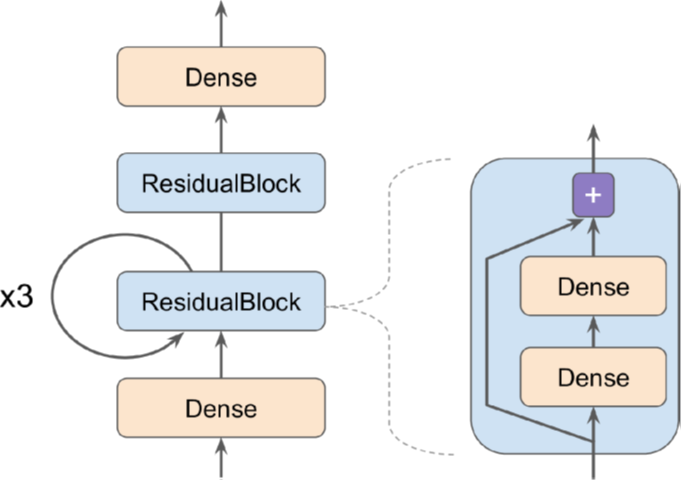

In [ ]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 837us/step - loss: 22.7478
Epoch 2/5
363/363 [==============================] - 0s 739us/step - loss: 1.2735
Epoch 3/5
363/363 [==============================] - 0s 737us/step - loss: 0.9792
Epoch 4/5
363/363 [==============================] - 0s 740us/step - loss: 0.5905
Epoch 5/5
162/162 [==============================] - 0s 526us/step - loss: 0.6513


In [ ]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [ ]:
model = keras.models.load_model("my_custom_model.ckpt")

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 851us/step - loss: 0.9476
Epoch 2/5
363/363 [==============================] - 0s 736us/step - loss: 0.6998
Epoch 3/5
363/363 [==============================] - 0s 737us/step - loss: 0.4668
Epoch 4/5
363/363 [==============================] - 0s 758us/step - loss: 0.4818
Epoch 5/5
363/363 [==============================] - 0s 756us/step - loss: 0.4591
